# Final Project 

## Objective

Develop a computational model to determine the feasibility and energy cost of using geothermal to supplement the cooling thermal management of buildings on campus.

## Framework

Each group should:
*	Identify the cooling demand based on the heat transfer analysis of the ice rink or of your model building
*	Derive the necessary geothermal system to deliver the required cooling demand
*	Simulate how the solution handles the hottest days and their impact on the thermal comfort and the ice
*	The energy cost to move fluid within the geothermal loop
*	Perform a thermal analysis of a few days to compare chilling power with heat load from external sources.

## Simplifying assumptions

*	Ground is assumed to be at $\mathrm{10^\circ C}$ at 2m deep
*	Soil can be sand or clay
*	For the heat exchange between soil and piping study two possibilities: 
    *	Option 1: The outside surface is at soil temperature in the heat exchanger
    *	Option 2: Introduce a parametric distance at which the soil is at 10C from the surface of the pipe. Study the effect of that distance on the pipe length
*	Recommended material for piping is HDPE
*	The heat exchanger is assumed to require cool temperature of $\mathrm{12^\circ C}$ and return temperature of $\mathrm{22^\circ C}$. Efficacy is estimated at 0.75
*	When using the model building, use an indoor temperature of $\mathrm{20^\circ C}$

<img src="HT Floor Plan 2.png" alt="Floor Plan For the Building"  width=50%> <img src="3D View House Plan.png" alt="Floor Plan For the Building"  width=50%>

This design is based off of the Richardson UVM dorm building on Trinity campus but is simplified in shape and contains only one floor. The design choices include one room and one entrance. For this analysis, the door opening and closing will be neglected. The area and volume of the building is 141.6 $m^2$ and 708 $m^3$ as it is 16.863m (l) x 8.402m (w) x 5m (h) and the assumed maximum number of people is 54 with heat generation of 100W per person. The roof is concrete and .425m thick with no angled incline. Therefore, the specific heat of the concrete is 0.96 $\frac{kJ}{kg K}$ and the thermal conductivity is 0.1-0.3 $\frac{W}{m K}$.

Analysis by structure component: 
* Vertical walls all experience natural and forced convection
* The roof and floor will experience natural and forced convection, radiation, and thermal conduction
  
  $q_{conv} = \frac{\bar{Nu}k_f}{L_{ref}}A_{wall}(T_{s,wall}-T_{\infty})$

  $k_f = k_{air}(T_f)$

  $T_f = \frac{T_{s,wall}+T_{\infty}}{2}$

  $\frac{dT_{room}}{dt} = \frac{1}{\rho_{air} Cp_{air} V}(E_{in} + \dot{q_{ppl}}-\dot{q_{cold}})$ (Conservation of Energy)

  $\frac{dt_{s,up}}{dt} = (\Sigma(q_{weather}) - \frac{1}{R_{tot}}(T_{s,up}-T_{s,low}))\frac{1}{\rho_0 Cp_0}$

  $\frac{dt_{s,low}}{dt} = (\frac{1}{R_{tot}}(T_{s,up}-T_{s,low}) - \frac{Nuk}{L_{roof}}(T_{s,low}-T_{sp}))\frac{1}{\rho_r Cp_r}$

  $\frac{dy_0}{dt} = f(t,y_0) - g(t,y_0,y_1)$

  $\frac{dy_1}{dt} = g(t,y_o,y_1) - h(t,y_o,y_1)$

In [1]:
import sys  
sys.path.insert(0, 'Libraries/') 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
xl = pd.ExcelFile('Climate/April-October-2020.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Climate/April-October-2020.xlsx'

## Available locations

In [4]:
xl.sheet_names 

['Canmore, AB',
 'Craftsbury, VT',
 'Bend, OR',
 'Boston, MA',
 'Bozeman, MT',
 'Essex Junction, VT',
 'Lake Placid, NY',
 'Minneapolis, MN',
 'Nagano City, Japan',
 'Randolph, VT',
 'Soldier Hollow, UT',
 'Villard de Lans, France']

## Vermont study: Burlington VT January 01, 2021 - December 31, 2021

In [5]:
xl = pd.ExcelFile('Climate/Burlington, VT 2021-01-01 to 2021-12-31.xlsx')

In [6]:
weather = pd.read_excel("Climate/Burlington, VT 2021-01-01 to 2021-12-31.xlsx",
                        sheet_name=xl.sheet_names[0],header=0,
                        converters= {'datetime': pd.to_datetime},)
weather = weather.set_index('datetime')
weather.head(1) 

,name,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01,"Burlington, VT",-3.9,-7.7,-8.8,68.6,0.0,NaN,NaN,0.0,6.3,...,1030.1,48.8,16.0,NaN,NaN,NaN,NaN,Partially cloudy,partly-cloudy-night,"72622564776,KPBG,KBTV,KMVL,72611454771,7261701..."


In [7]:
loc = 'Essex Junction, VT'
weather = pd.read_excel("Climate/April-October-2020.xlsx",
                        sheet_name=loc,header=0,
                        converters= {'Date time': pd.to_datetime},)
weather = weather.set_index('Date time')
weather['Name'].head(1)

### Clean possible NaNs

In [8]:
interp_method = 'linear' 
weather['Solar Radiation'] = weather['Solar Radiation'].fillna(0.0)
weather['Cloud Cover'] = weather['Cloud Cover'].fillna(0.0)
weather['Precipitation'] = weather['Precipitation'].fillna(0.0)
weather['Wind Speed'] = weather['Wind Speed'].interpolate(interp_method)
weather['Temperature'] = weather['Temperature'].interpolate(interp_method)
weather['Solar Radiation'] = weather['Solar Radiation'].interpolate(interp_method)
weather['Cloud Cover'] = weather['Cloud Cover'].interpolate(interp_method)
weather['Dew Point'] = weather['Dew Point'].interpolate(interp_method)
weather['Precipitation'] = weather['Precipitation'].interpolate(interp_method)
weather['Relative Humidity'] = weather['Relative Humidity'].interpolate(interp_method)

# weather['Name'].head(-2)

### Visual data check

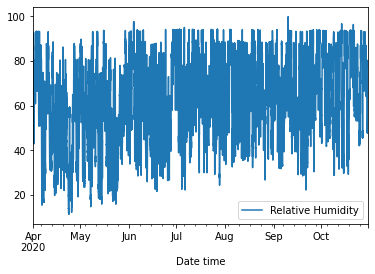

In [9]:
ax0 = weather.plot(y='Solar Radiation')
ax0 = weather.plot(y='Temperature')
ax0 = weather.plot(y='Cloud Cover')
ax0 = weather.plot(y='Wind Speed')
ax0 = weather.plot(y='Dew Point')
ax0 = weather.plot(y='Precipitation')
ax0 = weather.plot(y='Relative Humidity')

### Creation of the interpolation function

Note the definition of new functions. Use `U_atmospheric(t)`, `T_atmospheric(t)`, `sun_irradiation(t)`, `dew_point(t)`, `cloud_cover`, `relative_humidity` and `rain_rate`. These functions already include the appropriate clipping of unrealistic values

In [10]:
from scipy.interpolate import interp1d
interp_method = 'cubic' #qa  Qa  qa

t_data = np.arange(0,weather.shape[0]*15*60,15*60)
U_atm = np.abs(weather['Wind Speed'][:].to_numpy()/3.6) #converted from km/h to m/s
T_atm = weather['Temperature'][:].to_numpy()
q_sun = weather['Solar Radiation'][:].to_numpy()
# CC = weather['Cloud Cover'][:].to_numpy()
cc = weather['Cloud Cover'][:].to_numpy()/100. # converted from % to fraction
rh = weather['Relative Humidity'][:].to_numpy() # left as %
p_r = weather['Precipitation'][:].to_numpy()*1e-3/(15*60) #converted to mm to m/s 
T_dp = weather['Dew Point'][:].to_numpy()
f_U_atm = interp1d(t_data,U_atm,kind=interp_method)
def U_atmospheric(t):
    global f_U_atm
    return np.maximum(f_U_atm(t),0.)
f_T_atm = interp1d(t_data,T_atm,kind=interp_method)
def T_atmospheric(t):
    global f_T_atm
    return f_T_atm(t)
f_q_sun = interp1d(t_data,q_sun,kind=interp_method)
def sun_irradiation(t):
    global f_q_sun
    return np.maximum(f_q_sun(t),0.)
f_CC = interp1d(t_data,cc,kind=interp_method)
def cloud_cover(t):
    global f_CC
    return np.clip(f_CC(t),0.,1.)
f_T_dp = interp1d(t_data,T_dp,kind=interp_method)
def dew_point(t):
    global f_T_dp
    return f_T_dp(t)
f_RH = interp1d(t_data,rh,kind=interp_method)
def relative_humidity(t):
    global f_RH
    return np.clip(f_RH(t),0.,100.)
f_rain = interp1d(t_data,p_r,kind=interp_method)
def rain_rate(t):
    global f_rain
    return np.maximum(f_rain(t),0.)

# Begin Working From Here 
### Importing libraries to solve heat transfer problem

In [11]:
import scipy.constants as csts
from scipy.integrate import solve_ivp
from Libraries import thermodynamics as thermo
from Libraries import HT_external_convection as extconv
from Libraries import HT_natural_convection as natconv

Convection heat transfer is determined by the relative strength of forced and natural convection. Here the forced convection is the wind over the roof. Regardless of the direction of the wind, the length of the slab is always assumed to be the length of the roof $L$. Thermodynamics properties with a subscript $f$ denotes properties evaluated at the film temperature
$$
T_f = \frac{T_{s,up}+T_\infty}{2}\,,
$$ where $T_{s,up}$ is the temperature at the top surface of the roof. For every time iteration, the following non-dimensional numbers are computed:
* Reynolds number quantifies the wind strength
$$
Re=\frac{U_\infty L}{\nu_f}
$$
* Grashof number quantifies the natural convection strength
$$
Gr=\frac{g\beta\left\vert T_{s,up}-T_\infty\right\vert L^3}{\nu_f^2}
$$
* Richardson number quantifies the relative strength of natural convection vs forced wind convection
$$
Ri=\frac{Gr}{Re^2}
$$
* Rayleigh number is required for Nusselt number convection in case of natural convection.
$$
Ra=\frac{g\beta\left\vert T_{s,up}-T_\infty\right\vert L^3}{\nu_f\alpha_f}
$$

The following algorithm determines the local average convection coefficient
$$
\bar{h}=\bar{h}_{forced}+\bar{h}_{natural}=\frac{\overline{Nu}_{forced}k_f}{L}+\frac{\overline{Nu}_{natural}k_f}{L}
$$
where $\overline{Nu}_{forced}$ is the correlation for the flow over a plate at constant temperature and $\overline{Nu}_{natural}$ is the correlation for natural convection over a horizontal surface at constant temperature. 

* If the wind velocity drops below $U_\infty=0.15\mathrm{m/s}$, there is no forced convection: $h_{forced}=0$
* If $Ri<0.1$, natural convection is negligible, $h_{natural} = 0$, compute $h_{forced}$
* If $Ri>10$, forced convection is negligible, $h_{forced}=0$, compute $h_{natural}$
* If $0.1\leq Ri\leq 10$ compute both $h_{forced}$ and $h_{natural}$
### Convection heat transfer on upper surface

Where you write equations and text

In [12]:
def outsideconvection(Uinf, T_f, Tinf, air_f,L_roof, Tsup):
    Re = np.abs(Uinf)*L_roof/air_f.nu
    Gr = natconv.Gr(beta=air_f.beta,DT=np.abs(Tsup-Tinf),D=L_roof,nu=air_f.nu)
    Ra = natconv.Ra(beta=air_f.beta,DT=np.abs(Tsup-Tinf),D=L_roof,nu=air_f.nu,alpha=air_f.alpha)
    if (Uinf < 0.15):
        ForcedConvection = False
        NaturalConvection = True
    else:
        Ri = Gr / Re**2
        if Ri < 0.1:
            ForcedConvection = True
            NaturalConvection = False
        elif Ri > 10:
            ForcedConvection = False
            NaturalConvection = True
        else:
            ForcedConvection = True
            NaturalConvection = True
    if ForcedConvection:
        if (Re <= 5e5):
            airflow = extconv.FlatPlate('laminar','isothermal',U_infty=Uinf,nu=air_f.nu,alpha=air_f.alpha, L=L_roof,xi=0,Re_xc= 5e5)
            airflow.average(L_roof)
            hconv_f = airflow.Nu_ave*air_f.k/L_roof
        elif Re > 5e5:
            airflow = extconv.FlatPlate('mixed','isothermal',U_infty=Uinf,nu=air_f.nu,alpha=air_f.alpha, L=L_roof,xi=0,Re_xc= 5e5)
            airflow.average(L_roof)
            hconv_f = airflow.Nu_ave*air_f.k/L_roof
    else:
        hconv_f = 0
    #Natural convection flux
    if NaturalConvection and Ra > 1e4:
        if Tsup >= Tinf:
            airflow = natconv.FlatPlate(Ra,air_f.Pr,'upper','hot')
        else:
            airflow = natconv.FlatPlate(Ra,air_f.Pr,'upper','cold')
        hconv_n = airflow.Nu*air_f.k/L_roof
    else:
        hconv_n = 0
    #Total convection flux (here not a function of Ri)
    h = hconv_n + hconv_f
    qpp = h*(Tinf - Tsup)
    
    return qpp

### Radiation between outer surface and sky

The radiation between the surface and sky depends on cloud coverage (variable $cc$ between 0 and 1), air temperature and the dew point temperature $T_{dp}$ for the correlation chosen below. 

#### Definition of $T_{sky}$
* $T_{\infty}$ Air temperature $\mathrm{^\circ C}$
* $T_{dp}$ Dew point temperature $\mathrm{^\circ C}$
* $cc$ Cloud coverage
* $\varepsilon_{clear}$: emissivity of clear blue sky
* $\varepsilon_{sky}=1$

$$
\varepsilon_{clear}=0.711 + 0.56\frac{Tdp}{100} + 0.73\left(\frac{Tdp}{100}\right)^2
$$

$$
Ca = 1. + 0.02224cc + 0.0035cc^2 + 0.00028cc^3
$$

$$
T_{sky}  = (Ca\varepsilon_{clear})^{0.25}(Tinf+273.15)
$$

#### Radiation coefficient between surface and sky
$$
h_{rad,sky}= \varepsilon_{sky}\sigma((T_{sky}+273.15)+(T_s+273.15))
        ((T_{sky}+273.15)^2+(T_s+273.15)^2)
$$

In [13]:
def T_sky(Tdp,cc,Tinf,Tsup):
    eps_clear = 0.711 + 0.56*(Tdp/100.) + 0.73*(Tdp/100.)**2
    Ca = 1. + 0.02224*cc + 0.0035*cc**2 + 0.00028*cc**3
    Tsky  = (Ca*eps_clear)**0.25*thermo.C2K(Tinf)
    hr = eps_sky*csts.sigma*(Tsky+thermo.C2K(Tsup))* \
        (Tsky**2+thermo.C2K(Tsup)**2)
    return Tsky,hr
def skyradiation(Tdp,cc,Tinf,Tsup):
    # Tsup must be in Celsius
    Tsky,hr = T_sky(Tdp,cc,Tinf,Tsup)
    qsky = eps_sky*csts.sigma*(Tsky**4 - thermo.C2K(Tsup)**4)
    return qsky

### Heat transfer with rain

Rain has a cooling or heating effect on the surface depending on the difference between the wet bulb temperature and the surface temperature. The wet bulb temperature is a function of air temperature and humidity. The heat flux of the rain onto the surface is then calculated as the difference of the rate of enthalpy of the rain at wet bulb temperature hitting the surface and the rate of enthalpy at surface temperature for the same flow rate (variable $Pr$ for precipitation).
#### Wet Bulb Temperature Correlation

$$
T_{WB}=T_\infty\arctan\left[0.1515977\sqrt{RH + 8.313659}\right] + \arctan(T_\infty + RH) - \arctan(RH - 1.676331) + 0.00391838RH^{1.5}\arctan(0.023101RH) \
            - 4.686035
$$

#### Heat Flux of Cooling by Rain
$$
q''=\rho C_p P_r(T_{WB}-Ts(t))
$$

where $\rho=1000\mathrm{kg/m^3}$, $C_p=4.19\times10^3\mathrm{J/Kg.K}$ and $P_r$ is the precipitation.

In [14]:
def T_wet_bulb(T,RH):
    return T * np.arctan(0.1515977*(RH + 8.313659)**0.5) + np.arctan(T + RH) \
            - np.arctan(RH - 1.676331) + 0.00391838*RH**1.5*np.arctan(0.023101*RH) \
            - 4.686035
def rain(pr,Tinf,RH,Tsup):
    Twb = T_wet_bulb(Tinf,RH)
#     print("rain",pr,Twb,Tinf,RH,Tsup)
    rho = 1000.
    Cp = 4.19e3
    return rho*Cp*pr*(Twb - Tsup)
    

## Governing Equation of the System

Conservation of energy equation is applied to the roof, which is assumed to be at uniform temperature $T_{s,up}(t)$:

$$
\iint_A\rho_{ins}C_{p,ins}\frac{dT_{s,up}}{dt}=\rho_{ins}C_{p,ins}A\frac{dT_{s,up}}{dt}=q_{sun}+q_{rain}+q_{conv}+q_{rad,sky}-q_{cond}=(q''_{sun}+q''_{rain}+q''_{conv}+q''_{rad,sky}-q''_{cond})A
$$

Therefore the equation govering the surface temperature is:
$$
\frac{dT_{s,up}}{dt}=\frac{1}{\rho_{ins}C_{p,ins}}(q''_{sun}+q''_{rain}+q''_{conv}+q''_{rad,sky}-q''_{cond})\;\;\;\;\;\mathrm{Eq.\;(1)}
$$

The cooling demand fluctuates over time:

$$
q''_{cool}(t)=\begin{cases}
\frac{1}{R''_{tot}}(T_{s,up}(t)-T_{s,lower}) &\text{if }T_{s,up}(t)\geq T_{s,lower}\\
0 & \text{otherwise}
\end{cases}
$$
where $R''_{tot}=R''_{cond,ins}+R''_{cond,concrete}$.

Note that the irradiation from the sun is only partly absorbed by the surface:
$$
q''_{sun}=\alpha_{abs}I_{sun}(t)\;,
$$
where $\alpha_{abs}$ is the surface absorptivity ($0\leq \alpha_{abs}\leq 1$, always) and $I_{sun}(t)$ is the measure irradiation from the sun.

Applying conservation of energy then to the room, which is assumed to be at uniform temperature $T_{sp}$. This temperature is altered by natural convection on the vertical walls, heat input from the weather, and heat generation from people. The desired temperature is maintained by the cooling load, $q_{cool}$.

The rate of change of the roof upper surface temperature is defined as:
$$
\frac{dT_{s,up}}{dt} = (\Sigma q_{weather}-\frac{1}{R_{tot}}(T_{s,up}-T_{s,lower}))\frac{1}{\rho_0 Cp_0}
$$
where the subscript 0 denotes the properties of the roof material.
The rate of change of the bottom surface of the roof, or the insulation if there is insulation is:
$$
\frac{dT_{s,lower}}{dt} = (\frac{1}{R_{tot}}(T_{s,up}-T_{s,lower}) - \frac{Nu.k}{L_{ref}}(T_{s,lower}-T_{sp}))\frac{1}{\rho_r Cp_r}
$$
where the subsctipt r denotes the properties of the air inside the room, and $L_{ref}$ is the building length.

# Heat Transfer Value Derivations 

In [18]:
import matplotlib
from scipy.integrate import solve_ivp       
alpha_s = 1.3 * 10**(-5) # Thermal Diffusivity of Concrete
eps_sky = 1.

# Dimensions of the roof are the same for the dimensions of the insulation layer
L_roof = 16.863 # m Length of the Roof 
W_roof = 8.402 # m width of the roof
A_roof = L_roof*W_roof # m^2 area of the roof
H_room = 5 #m
V_room = A_roof*H_room #m^3
T_room = 20 #C  
DT_room = 1 



def f_room(t,T):
    global L_roof,Rpp_tot,eps,f_U_atm,f_T_atm,f_q_sun,rho,C_p,alpha_s,f_CC,f_T_dp,T_sp,DT_sp
    global V_room
    dTdt = np.zeros(len(T))
    # film temperature between ambient and upper surface
    Tinf = T_atmospheric(t)
    Uinf = U_atmospheric(t)
    
    T_f = (T[0]+Tinf)/2
    air_f = thermo.Fluid('air',T_f,"C")
    Tdp = dew_point(t)
    cc = cloud_cover(t)
    pr = rain_rate(t)
    rh = relative_humidity(t)
    
    
    qpp_sun = alpha_s*sun_irradiation(t)
    
    qpp_sky = skyradiation(Tdp,cc,Tinf,T[0]) #h_rad(T_s - T_sky)
    
    qpp_conv = outsideconvection(Uinf, T_f,Tinf, air_f,L_roof, T[0]) #h_conv_tot(T_s -T_inf)
    
    qpp_rain = rain(pr,Tinf,rh,T[0]) #h_rain(Twb - T_s)
    
    qpp_cond = 1/Rpp_tot*(T[0] - T[1])
    
    T_f_in = (T[1] + T[2])/2.
    air_f_in = thermo.Fluid('air',T_f_in,"C")
    qpp_conv_in = insideconvection(T_f_in, T[2], air_f_in, L_roof, T[1])
    qpp_weather = qpp_sun + qpp_sky + qpp_conv + qpp_rain
    qpp_total = qpp_weather - qpp_cond
    dTdt[0] = qpp_total/(rho*C_p)
    dTdt[1] = (qpp_cond - qpp_conv_in)/(air_f_in.rho*air_f_in.Cp)
    air_room = thermo.Fluid('air',T[2],"C")

    dTdt[2] = (qpp_conv_in*A + T[3]*q_hvac)/(air_room.rho*air_room.Cp*V_room)
    if T[2] > T_room + DT_room:
        if T[3] >= -1:
            dTdt[3] = -1./T_hvac
        print('dTdt')
    elif T[2] < T_sp - DT_sp:
        if T[3] <= 1.*heating_coef:
            dTdt[3] = 1./T_hvac*heating_coef
        print('dTdt')
    return dTdt

    
#     q_cool_max = qpp_cond/.75
#     T_hvac = 240 #s
#     #this is a value of 4 minutes
 
    
#    global q_cool_max,T_hvac,V_room, qpp_cond

#     #Need to define: q_hvac power delivered by hvac; V_room; insideconvection(...) function; DT_sp = 1

IndentationError: IndentationError: unindent does not match any outer indentation level

## Thermal Circuit Representation

In [163]:
from Libraries import HT_natural_convection as natconv
def insideconvection(T_film_in, T_room_avg, room_air, L_roof, T_ceiling):
    room_air = thermo.Fluid('air',T_film_in, 'C')
    Ra = natconv.Ra(beta=room_air.beta,DT=np.abs(T_ceiling-T_room_avg),D=L_roof,nu=room_air.nu,alpha=room_air.alpha)
    roomflow = natconv.FlatPlate(Ra,room_air.Pr,'lower','hot')
    return (T_film_in)

* `T[0]` : Temperature of the surface of the roof exposed to the outside
* `T[1]` : Temperature of the ceiling
* `T[2]` : Average temperature of the room
* `T[3]` : is NOT a temperature, it is a coefficient equal to 1 when heating is needed, -1 when cooling is needed and 0 when `T[2]` is between $T_{room}-\Delta_{room}$ and $T_{room}+\Delta_{room}$

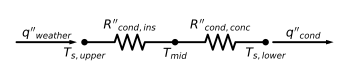

In [164]:
air_room = thermo.Fluid('air',T_sp,"C")
rho_conc = 2400.  #kg/m^3
rho_room = air_room.rho #kg/m^3, room air density
rho_insulation = 0.00096 #kg/m^3
C_p_conc = 0.96  #kJ/kg.K
C_p_room = air_room.Cp #kJ/kg.K
C_pinsulation = 1100 # kJ/kg.K
k_insulation = 1.18 # Thermal Conductivity of 2" Rigid Foam Polystyrene Panels
k_concrete = 0.03 # Thermal Conductivity kW/m K
H_concrete = 0.425 # m thickness of the concrete layer
H_insulation = 0.05 #m

import schemdraw as schem
import schemdraw.elements as e
from Libraries import HT_thermal_resistance as res
Rpp = []
Rpp.append(res.Resistance("$R''_{cond,ins}$","W/m^2"))
Rpp.append(res.Resistance("$R''_{cond,conc}$","W/m^2"))
Rpp[0].cond_plane(k_ins,H_ins)
Rpp[1].cond_plane(k_concrete,H_concrete)
Rpp_tot = Rpp[0].R + Rpp[1].R

d = schem.Drawing()
d.add(e.DOT, botlabel = "$T_{s,upper}$")
d.add(e.RES, d='right', label=Rpp[0].name)
d.add(e.DOT, botlabel = "$T_{mid}$")
d.add(e.RES, d='right', label=Rpp[1].name)
d.add(e.DOT, botlabel = "$T_{s,lower}$")
d.add(e.ARROW, toplabel = "$q''_{weather}$", endpts= [[-2.25,0],[-0.25,0]])
d.add(e.ARROW, toplabel = "$q''_{cond}$", endpts= [[6.25,0],[8.25,0]])
d.draw()

## Main Code

The integration with respect to time of the dTdt[] array (seen above) is realized with the adaptive time-stepping method LSODA available in the library `scipy.integrate` for initial value problem (IVP). This solves for the change of roof, ceiling, and room temperatures over a year. The time step for this is set at 15 mins. The LSODA method automatically subdivides this time step into smaller sub-time steps if the solution experiences large fluctuations. This method guarantees the stability of the simulation if the maximum time steps (15 mins) is small enough. A convergence analysis performed by the instructor determined 15 mins was a good compromise of stability and computational speed.

In [199]:
tmax = t_data[-1]
mask = np.where(t_data <= tmax)
sol = solve_ivp(f_room,[0,tmax],[f_T_atm(t_data[0]),T_sp,T_sp,0],method='LSODA',t_eval=t_data[mask],max_step=DT_room)


NameError: NameError: name 'A' is not defined

AttributeError: AttributeError: 'function' object has no attribute 'y'

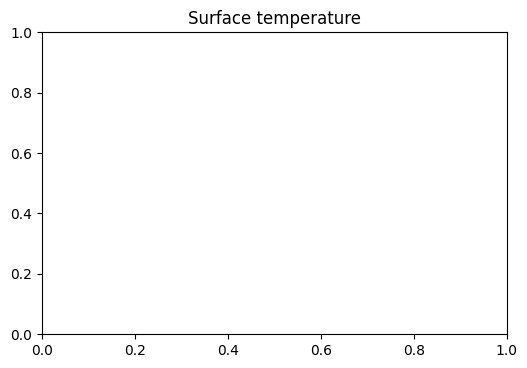

In [203]:
import matplotlib.pyplot as plt
from sympy import solve as sol

plt.figure(dpi=100)
plt.title("Surface temperature")
plt.plot(sol.y[0])
plt.xlabel("increments of 15 mins")
plt.show()

### Output

The solution is stored in the weather dataframe using two new columns, one for upper surface temperature, the other as the cooling energy needed to maintain target temperature on the lower surface.

In [202]:
from sympy import solve as sol
weather['Tsup'] = sol.y[0] #gets T_s,up
weather['q_cool'] = np.maximum(k*(sol.y[0] - T_s_lower)/H*A,0.)

AttributeError: AttributeError: 'function' object has no attribute 'y'

In [91]:
print("Maximum cooling demand: %.0f W" %weather['q_cool'].max())
print("on %s " %weather.index[weather['q_cool'].argmax()].strftime("%m/%d/%Y, %H:%M:%S"))

KeyError: KeyError: 'q_cool'

In [92]:
print("on %s " %weather.index[weather['q_cool'].argmax()].strftime("%m/%d/%Y, at %H:%M:%S"))

KeyError: KeyError: 'q_cool'

In [93]:
ax0 = weather.plot(y='q_cool')
weather.plot(y='Precipitation',ax=ax0, secondary_y=True)


KeyError: KeyError: 'q_cool'

## Piping Inside the Ground

We consider a closed loop pipe system containing water. From the given assumptions, the water should arrive at the heat exchanger with a temperature of $\mathrm{12^\circ C}$ and exits the heat exchanger at $\mathrm{22^\circ C}$. Assuming that these temperatures are the temperatures at the entrance of the pipe ($\mathrm{12^\circ C}$) and the exit ($\mathrm{22^\circ C}$), the heat transfer between the ground and the water circulating in a pipe buried into it is:

$$
q=\dot{m}C_p(T_{m,i}-T_{m,o})\;\;\;\;\;\mathrm{Eq\;(3)}
$$
where $\dot{m}$ is the mass flow rate.

Using a 1" inside diameter of HDPE pipes and the maximum cooling demand of 10000W (slightly more that the maximum cooling demand divided by the efficacy of the system), Eq. (3) is used to determine the flow rate. This in turn defines the convection coefficient of the flow within the pipe using the Dittus Boettler correlation. 

Assuming that the outside surface of the pipe is at $\mathrm{0^\circ C}$, the total resistance between the flow and the snow per unit length is:

$$
R'_{tot}=R'_{conv,i}+R'_{cond}
$$

$L$ is then the solution of the equation for the variation of temperature between the inlet and outlet of the pipe for the target outlet temperature $T_{m,o}$.

$$
\frac{T_\infty-T_{m,o}}{T_\infty-T_{m,i}}=\exp\left(-\frac{1}{\dot{m}C_pR_\text{tot}}\right)
$$

First, assuming 1D and steady convection on the outside of the pipe, we must solve for $R'_{tot}$. Since:

$$
R_{tot}=\frac{R'_{tot}}{L}
$$

the pipe length is:

$$
L=-\dot{m}C_pR'_\text{tot}\ln\frac{T_\infty-T_{m,o}}{T_\infty-T_{m,i}}
$$

In [168]:
Gl
#ground
Tmi = 12. #C
Tmo = 22. #C
q_out = q_cool_max #W found based on q_weather,max & q_ppl, max
DT_ground = Tmo - Tmi
Tm = (Tmo + Tmi)/2
water_Tm = thermo.Fluid('water',Tm,"C")
mdot = q_cool_max/(water_Tm.Cp*abs(DT_ground))
print("mass flow rate: %.4f kg/m^3" %mdot)
Di = 1*0.0254
Do = Di + 0.3*0.0254
kpipe = 2.25
A = np.pi*Di**2/4
Um = mdot/(water_Tm.rho*A)
print("Average velocity: %.3f m/s" %Um)

NameError: NameError: name 'q_cool_max' is not defined

In [198]:
from Libraries import HT_thermal_resistance as res
from Libraries import HT_internal_convection as intconv
Rp = []
Rp.append(res.Resistance("$R'_{conv,i}$", "W/m"))
Rp.append(res.Resistance("$R'_{cond}$", "W/m"))
pipeflow = intconv.PipeFlow(D=Di,L=1,Um=Um,nu=water_Tm.nu)
print("Re_D_pipe= %.0f" %pipeflow.Re)
pipeflow.Dittus_Boelter(mode='cooling',Pr=water_Tm.Pr)
hint = pipeflow.Nu*water_Tm.k/Di
print("h_int=%.1f W/m^2.K" %hint)
Rp[0].convection(h=hint,A=np.pi*Di)

# conduction
Rp[1].cond_cylinder(k=kpipe,ra=Di,rb=Do,L=1.)
Rptot = Rp[0].R + Rp[1].R
T_infty=0.
L = intconv.L_given_other_params(T_infty,Tmo,Tmi,mdot,water_Tm.Cp,Rptot)

NameError: NameError: name 'Di' is not defined

In [ ]:
print("The necessary length of the pipe is %.0f m" %L)